## <center><b>Spark's Fund Buisness Analysis</b></center>

### Business objective: The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

#### Checkpoint 1: Data Cleaning 1


- Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively.
- How many unique companies are present in rounds2?
- How many unique companies are present in companies?
- In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.
- Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
- Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

##### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
companies = pd.read_csv("D:/NIIT Tasks/Extra/Spark Funds Industrail Assigment/Spark Funds Industrial Assignment - 1/companies.txt", sep = '\t', encoding = "ISO-8859-1")
rounds2 = pd.read_csv("D:/NIIT Tasks/Extra/Spark Funds Industrail Assigment/Spark Funds Industrial Assignment - 1/rounds2.csv",encoding='unicode_escape')

In [3]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
## Exploring the data
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [6]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


##### 1.1 ) How many unique companies are present in rounds2?

In [7]:
a = len(rounds2.company_permalink.str.lower().unique())
print("There are", a , "unique companies present in rounds2.")

There are 66370 unique companies present in rounds2.


##### 1.2 ) How many unique companies are present in companies?

In [8]:
b = len(companies.permalink.str.lower().unique())
print("There are", b , "unique companies present in rounds2.")

There are 66368 unique companies present in rounds2.


##### 1.3) In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.

- "company_permalink" or "permalink" column cab be used as the unique key for each company

##### 1.4) Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

In [9]:
print(" Yes, there are", a-b, "companies present in rounds2 file which are not present in companies.")

 Yes, there are 2 companies present in rounds2 file which are not present in companies.


##### 1.5) Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

- As the company is present in upper and lower cases in both the dataframes so converting it to lower so to get unique values 

In [10]:
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [11]:
master_frame = pd.merge(rounds2, companies , how='inner', left_on='company_permalink', right_on='permalink')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [12]:
print("There are", len(master_frame), "observations present in master_frame.")

There are 114942 observations present in master_frame.


In [13]:
master_frame.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'permalink',
       'name', 'homepage_url', 'category_list', 'status', 'country_code',
       'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [14]:
# making a copy of master_frame to work on it
master_frame1 = master_frame.copy()


In [15]:
# removing unwanted columns from master_frame

master_frame1 =  master_frame1.drop(['funding_round_code', 'funding_round_permalink', 'funded_at','permalink', 'homepage_url',
                                 'state_code', 'region', 'city', 'founded_at','status'], axis = 1)



In [16]:
master_frame1

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
1,/organization/-qounter,venture,NaN,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,venture,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
...,...,...,...,...,...,...
114937,/organization/zzzzapp-com,convertible_note,41313.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV
114938,/organization/zzzzapp-com,seed,32842.0,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV
114939,/organization/ãeron,venture,NaN,ÃERON,NaN,NaN
114940,/organization/ãasys-2,seed,18192.0,Ãasys,Consumer Electronics|Internet of Things|Teleco...,USA


In [17]:
## checking for null values

master_frame1.isnull().sum()


company_permalink         0
funding_round_type        0
raised_amount_usd     19984
name                      1
category_list          3407
country_code           8671
dtype: int64

- There are null values present in some columns so dropping the null values as imputating it can disturb the data which is not good for analysis and after deleting null rows there is still enough data to analyse.

In [18]:
master_frame1 = master_frame1.dropna()

In [19]:
master_frame1.isnull().sum()

company_permalink     0
funding_round_type    0
raised_amount_usd     0
name                  0
category_list         0
country_code          0
dtype: int64

- Now there are no null values in the dataset

### Checkpoint 2: Funding Type Analysis


- This is the first of the three goals of data analysis – investment type analysis. The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), its stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD), and so on. For example, seed, angel and venture are three common stages of startup funding.

-    Considering the constraints of Spark Funds, you have to decide one funding type which is most suitable for them. 
1. Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)
2. Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?
-   Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it? Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type.

 

#### Here the company only want to invest in four funding types i.e venture, angel, seed and private equity

In [20]:
## filtering the the data according to this four funding types

master_frame2 =master_frame1[master_frame1['funding_round_type'].isin(['seed','angel','venture','private_equity'])]

In [21]:
master_frame2.funding_round_type.unique()

array(['venture', 'seed', 'private_equity', 'angel'], dtype=object)

In [22]:
## getting the values in million
master_frame2['raised_amount_usd'] = master_frame2['raised_amount_usd']/1000000

In [23]:
master_frame2.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
private_equity    73.938486
venture           11.724223
angel              0.971574
seed               0.747828
Name: raised_amount_usd, dtype: float64

- From the data it is seen that <b>Venture</b> funding round type is the best suitable as the company want to invest between $5-15 Millions.

In [24]:
## filterting the data with funding round type as Venture
master_frame2 = master_frame2[master_frame2['funding_round_type'] == 'venture'] 


### Checkpoint 3: Country Analysis

- Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.
1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type) 
2. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [25]:
country = master_frame2.groupby('country_code')
round(country['raised_amount_usd'].sum().sort_values(ascending=False).head(9),2)

country_code
USA    420068.03
CHN     39338.92
GBR     20072.81
IND     14261.51
CAN      9482.22
FRA      7226.85
ISR      6854.35
DEU      6306.92
JPN      3167.65
Name: raised_amount_usd, dtype: float64

- These are the top 9 countries which have received the highest total funding. 

In [26]:
top9 = master_frame2[master_frame2['country_code'].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]

In [27]:
top9

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10.000000,#fame,Media,IND
4,/organization/0-6-com,venture,2.000000,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,venture,0.719491,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,venture,20.000000,H2O.ai,Analytics,USA
11,/organization/0xdata,venture,1.700000,H2O.ai,Analytics,USA
...,...,...,...,...,...,...
114915,/organization/zyomyx-inc,venture,14.219999,ZYOMYX,Biotechnology,USA
114916,/organization/zyomyx-inc,venture,0.555016,ZYOMYX,Biotechnology,USA
114927,/organization/zyrra,venture,0.140500,Zyrra,E-Commerce,USA
114929,/organization/zystor,venture,8.500000,Zystor,Biotechnology,USA


- The top 3 english speaking countries can be found manually and in this list it is
1. USA
2. GBR
3. IND

### Checkpoint 4: Sector Analysis 1

- When we say sector analysis, we refer to one of the eight main sectors (named main_sector) listed in the mapping file (note that ‘Other’ is one of the eight main sectors). This is to simplify the analysis by grouping the numerous category lists (named ‘category_list’) in the mapping file. For example, in the mapping file, category_lists such as ‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’.


- You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.
1. Extract the primary sector of each category list from the category_list column. 
2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [28]:
master_frame2['category_list']=master_frame2['category_list'].apply(lambda x:x.split('|')[0])
master_frame2.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10.000000,#fame,Media,IND
4,/organization/0-6-com,venture,2.000000,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,venture,0.719491,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,venture,20.000000,H2O.ai,Analytics,USA
11,/organization/0xdata,venture,1.700000,H2O.ai,Analytics,USA


In [29]:
## Importing the mapping file

mapping = pd.read_csv("D:/NIIT Tasks/Extra/Spark Funds Industrail Assigment/Spark Funds Industrial Assignment - 1/mapping.csv")

In [30]:
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [31]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [32]:
mapping = mapping.dropna()

In [33]:
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [34]:
mapping1=pd.melt(mapping,id_vars=['category_list'],var_name='Main_Sector')
mapping1=mapping1[mapping1['value']==1]
mapping1

,category_list,Main_Sector,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1
...,...,...,...
6112,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6113,Social Television,"Social, Finance, Analytics, Advertising",1
6114,Social Travel,"Social, Finance, Analytics, Advertising",1
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [35]:
sector_df=pd.merge(master_frame2,mapping1,left_on='category_list',right_on='category_list')

# Renaming the columns
sector_df=sector_df.rename(columns={'category_list':'Primary_Sector'})
sector_df

,company_permalink,funding_round_type,raised_amount_usd,name,Primary_Sector,country_code,Main_Sector,value
0,/organization/-fame,venture,10.000000,#fame,Media,IND,Entertainment,1
1,/organization/90min,venture,15.000000,90min,Media,GBR,Entertainment,1
2,/organization/90min,venture,5.800000,90min,Media,GBR,Entertainment,1
3,/organization/90min,venture,18.000000,90min,Media,GBR,Entertainment,1
4,/organization/all-def-digital,venture,5.000000,All Def Digital,Media,USA,Entertainment,1
...,...,...,...,...,...,...,...,...
44687,/organization/yapta,venture,4.220000,Yapta,Tracking,USA,Others,1
44688,/organization/yapta,venture,2.000000,Yapta,Tracking,USA,Others,1
44689,/organization/yapta,venture,1.786563,Yapta,Tracking,USA,Others,1
44690,/organization/yunnan-landsun-green-industry-gr...,venture,7.227332,Yunnan Landsun Green Industry (Group),Tea,CHN,Others,1


In [36]:
sector_df["Main_Sector"].unique()

array(['Entertainment', 'News, Search and Messaging',
       'Cleantech / Semiconductors', 'Others', 'Health',
       'Social, Finance, Analytics, Advertising', 'Manufacturing',
       'Automotive & Sports'], dtype=object)

### Checkpoint 5: Sector Analysis 2

1. Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. 
- The three data frames should contain:  All the columns of the master_frame along with the primary sector and the main sector 
- The total number (or count) of investments for each main sector in a separate column 
- The total amount invested in each main sector in a separate column

##### Here the three countries are USA,GBR and IND so lets name it as
- D1 = USA
- D2 = GBR
- D3 = IND

In [37]:
D1=sector_df[sector_df['country_code']=='USA']
D1 = D1[(D1['raised_amount_usd'] >= 5) & (D1['raised_amount_usd'] <= 15)]

In [38]:
#D1

In [39]:
a1 = round(D1.raised_amount_usd.sum(),2)
print("Total Amount of Investment in USA", a1, "Millon USD")

Total Amount of Investment in USA 99661.52 Millon USD


In [40]:
a2 = D1.raised_amount_usd.count()
print("Total Number of Investments in USA", a2)

Total Number of Investments in USA 11149


In [41]:
D1_sector=D1.groupby('Main_Sector')
print("Number of Investment per sector in USA")
D1_sector['raised_amount_usd'].count().sort_values(ascending = False)

Number of Investment per sector in USA


Main_Sector
Others                                     2923
Cleantech / Semiconductors                 2297
Social, Finance, Analytics, Advertising    1912
News, Search and Messaging                 1563
Health                                      908
Manufacturing                               799
Entertainment                               580
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [42]:
print("Total invested amount per sector in USA")
D1_sector['raised_amount_usd'].sum().sort_values(ascending = False)

Total invested amount per sector in USA


Main_Sector
Others                                     26089.280296
Cleantech / Semiconductors                 21181.003033
Social, Finance, Analytics, Advertising    16680.695048
News, Search and Messaging                 13796.816094
Health                                      8200.859357
Manufacturing                               7258.553378
Entertainment                               5000.212982
Automotive & Sports                         1454.104361
Name: raised_amount_usd, dtype: float64

In [43]:

print("Company with most number of investment in top sector in USA")
D1[D1['Main_Sector']=='Others'].groupby(['Main_Sector','company_permalink']).raised_amount_usd.count().sort_values(ascending=False).head(1)

Company with most number of investment in top sector in USA


Main_Sector  company_permalink    
Others       /organization/capella    6
Name: raised_amount_usd, dtype: int64

In [44]:
print("Company with most number of investment in second top sector in USA")
D1[D1['Main_Sector']=='Cleantech / Semiconductors'].groupby(['Main_Sector','company_permalink']).raised_amount_usd.count().sort_values(ascending=False).head(1)

Company with most number of investment in second top sector in USA


Main_Sector                 company_permalink        
Cleantech / Semiconductors  /organization/tigo-energy    8
Name: raised_amount_usd, dtype: int64

##### Second Country D2 = GBR (United Kingdom)

In [45]:
D2=sector_df[sector_df['country_code']=='GBR']
D2 = D2[(D2['raised_amount_usd'] >= 5) & (D2['raised_amount_usd'] <= 15)]

In [46]:
b1 = round(D2.raised_amount_usd.sum(),2)
print("Total Amount of Investment in GBR(United Kingdom) is", b1, "Millon USD")

Total Amount of Investment in GBR(United Kingdom) is 5028.7 Millon USD


In [47]:
b2 = D2.raised_amount_usd.count()
print("Total Number of Investments in GBR(United Kingdom) are", b2)

Total Number of Investments in GBR(United Kingdom) are 577


In [48]:
D2_sector=D2.groupby('Main_Sector')
print("Number of Investment per sector in GBR(United Kingdom)")
D2_sector['raised_amount_usd'].count().sort_values(ascending = False)

Number of Investment per sector in GBR(United Kingdom)


Main_Sector
Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising     98
News, Search and Messaging                  73
Entertainment                               54
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [49]:
print("Total invested amount per sector in GBR(United Kingdom)")
D2_sector['raised_amount_usd'].sum().sort_values(ascending = False)

Total invested amount per sector in GBR(United Kingdom)


Main_Sector
Others                                     1249.124289
Cleantech / Semiconductors                 1136.905008
Social, Finance, Analytics, Advertising     821.888357
News, Search and Messaging                  615.746235
Entertainment                               461.511059
Manufacturing                               361.940335
Health                                      214.537510
Automotive & Sports                         167.051565
Name: raised_amount_usd, dtype: float64

In [50]:
print("Company with most number of investment in top sector in GBR(United Kingdom)")
D2[D2['Main_Sector']=='Others'].groupby(['Main_Sector','company_permalink']).raised_amount_usd.count().sort_values(ascending=False).head(1)

Company with most number of investment in top sector in GBR(United Kingdom)


Main_Sector  company_permalink    
Others       /organization/sensage    4
Name: raised_amount_usd, dtype: int64

In [51]:
print("Company with most number of investment in second top sector in GBR(United Kingdom)")
D2[D2['Main_Sector']=='Cleantech / Semiconductors'].groupby(['Main_Sector','company_permalink']).raised_amount_usd.count().sort_values(ascending=False).head(1)

Company with most number of investment in second top sector in GBR(United Kingdom)


Main_Sector                 company_permalink                                                          
Cleantech / Semiconductors  /organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h    3
Name: raised_amount_usd, dtype: int64

#### Third Country D3 = IND (India)

In [52]:
D3=sector_df[sector_df['country_code']=='IND']
D3 = D3[(D3['raised_amount_usd'] >= 5) & (D3['raised_amount_usd'] <= 15)]

In [53]:
c1 = round(D3.raised_amount_usd.sum(),2)
print("Total Amount of Investment in IND (India) is", c1, "Millon USD")

Total Amount of Investment in IND (India) is 2683.54 Millon USD


In [54]:
c2 = D3.raised_amount_usd.count()
print("Total Number of Investments in IND (India) are", c2)

Total Number of Investments in IND (India) are 299


In [55]:
D3_sector=D3.groupby('Main_Sector')
print("Number of Investment per sector in IND (India)")
D3_sector['raised_amount_usd'].count().sort_values(ascending = False)

Number of Investment per sector in IND (India)


Main_Sector
Others                                     109
News, Search and Messaging                  52
Entertainment                               33
Social, Finance, Analytics, Advertising     32
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [56]:
print("Total invested amount per sector in IND (India)")
D3_sector['raised_amount_usd'].sum().sort_values(ascending = False)

Total invested amount per sector in IND (India)


Main_Sector
Others                                     1007.409507
News, Search and Messaging                  433.834545
Social, Finance, Analytics, Advertising     290.543500
Entertainment                               280.830000
Manufacturing                               200.900000
Health                                      167.740000
Cleantech / Semiconductors                  165.380000
Automotive & Sports                         136.900000
Name: raised_amount_usd, dtype: float64

In [57]:
print("Company with most number of investment in top sector in IND (India)")
D3[D3['Main_Sector']=='Others'].groupby(['Main_Sector','company_permalink']).raised_amount_usd.count().sort_values(ascending=False).head(1)

Company with most number of investment in top sector in IND (India)


Main_Sector  company_permalink   
Others       /organization/myntra    4
Name: raised_amount_usd, dtype: int64

In [58]:
print("Company with most number of investment in second top sector in IND (India)")
D3[D3['Main_Sector']=='News, Search and Messaging'].groupby(['Main_Sector','company_permalink']).raised_amount_usd.count().sort_values(ascending=False).head(1)

Company with most number of investment in second top sector in IND (India)


Main_Sector                 company_permalink                             
News, Search and Messaging  /organization/gupshup-technology-india-pvt-ltd    3
Name: raised_amount_usd, dtype: int64

### Checkpoint 6: Plots

1. A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds. 
2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear. 
3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [59]:
plot_df = master_frame1[master_frame1['funding_round_type'].isin(['venture','seed','angel','private_equity'])]

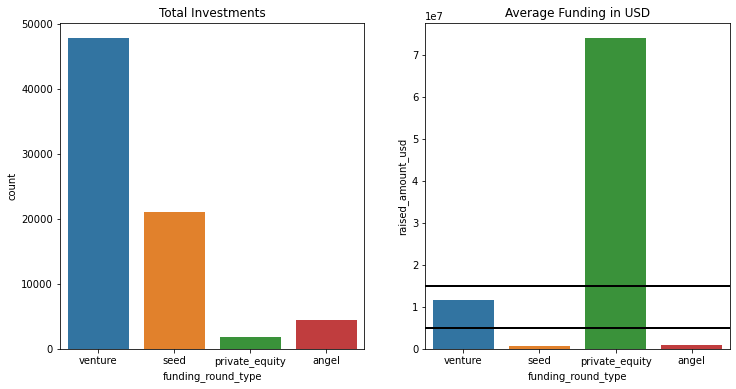

In [60]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", data=plot_df)
plt.title("Total Investments")
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=plot_df, estimator=np.mean, ci = None)
plt.title("Average Funding in USD")
plt.axhline(y=5000000, linewidth=2, color = 'black')
plt.axhline(y=15000000, linewidth=2, color = 'black')
plt.show()

- From the graph it is seen that as the Venture has highest number of investments and also the average amount raised in Venture type is between 5-15 Million USD which is most suitable for company. 

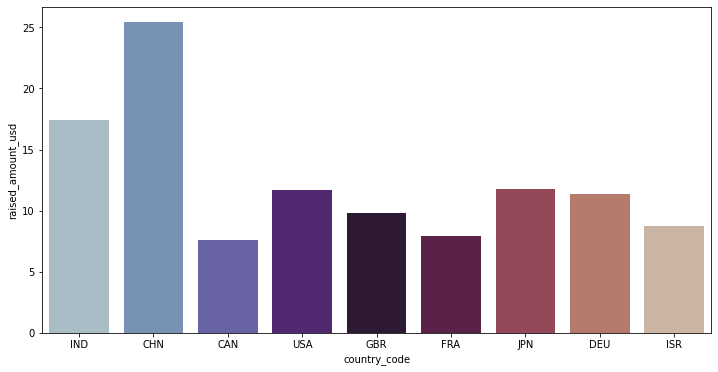

In [61]:
plt.figure(figsize=(12, 6))
plot2 = sns.barplot(x='country_code' ,y='raised_amount_usd' , data = top9, ci =None, palette='twilight')
plt.show()

- These are the top 9 countries with total amount of investments in <b> Venture </b> funding type. 

In [62]:
D1_plot = D1[D1['Main_Sector'].isin(["Others","Cleantech / Semiconductors", "Social, Finance, Analytics, Advertising"])]
D2_plot = D2[D2['Main_Sector'].isin(["Others","Cleantech / Semiconductors", "Social, Finance, Analytics, Advertising"])]
D3_plot = D3[D3['Main_Sector'].isin(["Others","News, Search and Messaging", "Entertainment"])]



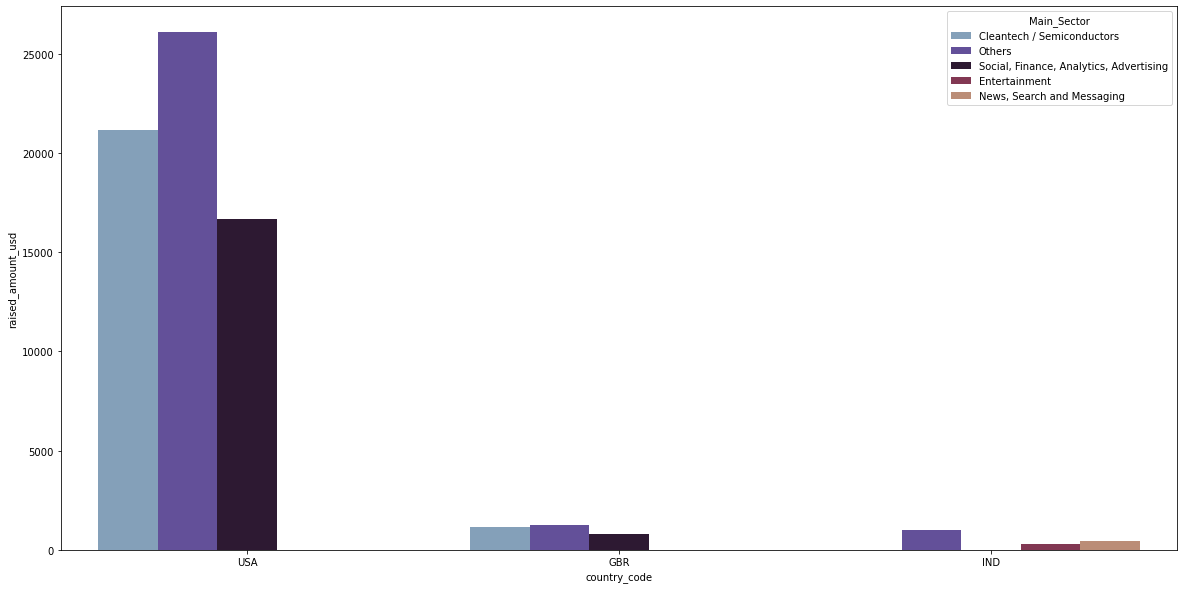

In [63]:
frames = [D1_plot, D2_plot, D3_plot]
result = pd.concat(frames)
plt.figure(figsize=(20, 10))
sns.barplot(x='country_code', y='raised_amount_usd', hue="Main_Sector", data=result, estimator=np.sum, ci=None, palette="twilight")
plt.show()

- These are the top 3 sectors from top 3 countries of Venture funding type.  

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

In [64]:
## creating files for tableau

#plot_df.to_csv("D:/NIIT Tasks/Extra/Spark Funds Industrail Assigment/plot_df/plot_df.csv")

In [65]:
#result.to_csv("D:/NIIT Tasks/Extra/Spark Funds Industrail Assigment/plot_df/result.csv")

In [66]:
#top9.to_csv("D:/NIIT Tasks/Extra/Spark Funds Industrail Assigment/plot_df/top9.csv")